### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [5]:
df = pd.read_json("data/silver/1920_2024.json")
df.Date = pd.to_datetime(df.Date)
stop_words = set(stopwords.words("english"))

In [27]:
df_2 = df.dropna(axis=0,how="any",subset=["Summary"])
df_2

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,None,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,None,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,None,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,None,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot
5033,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot
5034,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,None,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot
5035,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir


In [30]:
df_2["word_list"] = df_2.Summary.apply(lambda x : x.split(" "))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_97416/4113127868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["word_list"] = df_2.Summary.apply(lambda x : x.split(" "))


In [48]:
def remove_stop_word(x):
    return [i for i in x if i.lower() not in stop_words]

In [49]:
df_2["word_list_removed_stop_words"] = df_2["word_list"].apply(remove_stop_word)

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_97416/3828410851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["word_list_removed_stop_words"] = df_2["word_list"].apply(remove_stop_word)


In [71]:
k = [i for j in  df_2["word_list_removed_stop_words"] for i in j]

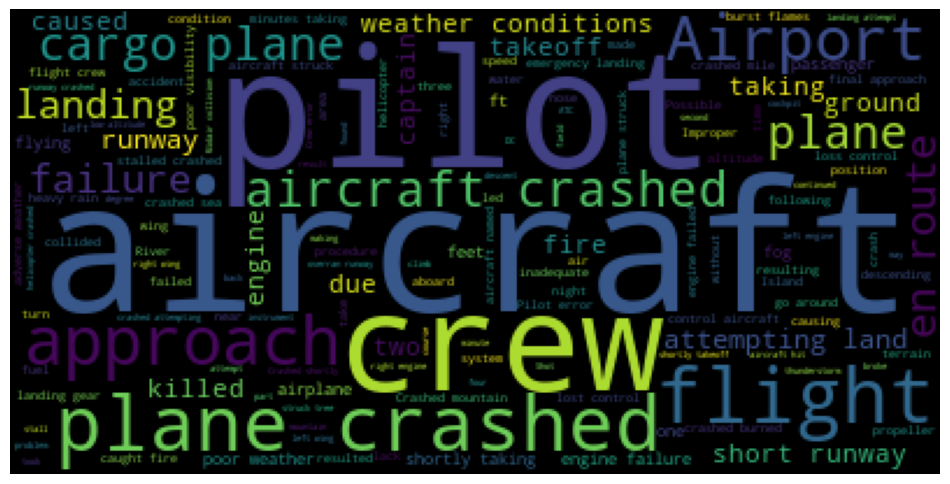

In [79]:
from wordcloud import WordCloud

width = 12
height = 12
plt.figure(figsize=(width, height))
#text = 'all your base are belong to us all of your base base base'
wc = WordCloud().generate(" ".join(k))
plt.imshow(wc)
# wordcloud = WordCloud(font_path='/Library/Fonts/Gotham-Bold.otf',width=1800,height=1400).generate(str(hr1_filter))
# plt.imshow(wordcloud)
plt.axis("off")
plt.show()